## Load MNIST data

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

Requirement already up-to-date: google-api-python-client in /srv/conda/lib/python3.7/site-packages (1.7.8)
Requirement already up-to-date: google-auth-httplib2 in /srv/conda/lib/python3.7/site-packages (0.0.3)
Requirement already up-to-date: google-auth-oauthlib in /srv/conda/lib/python3.7/site-packages (0.3.0)


In [2]:
# function to read and show images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
d0 = pd.read_csv('./train.csv')
print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
# save the labels into a variable l
l = d0['label']

print(l.head(5))

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [5]:
# Drop the label feature and store the pixel data in d.

d = d0.drop("label",axis = 1)

print(d.head(5))

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [6]:
print(d.shape)

(499, 784)


In [7]:
print(l.shape)

(499,)


/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


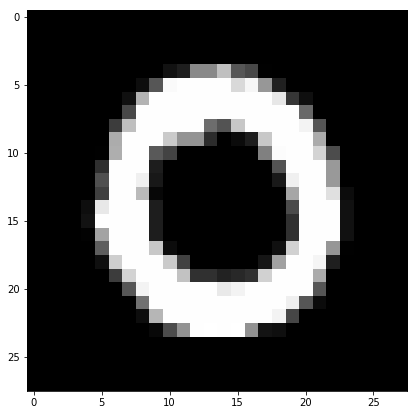

0


In [8]:
# Display or plot a number
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].as_matrix().reshape(28,28) #reshape from 1d to 2d pixel array
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])

### Visualization using PCA

In [9]:
# Pick first sample point to work on for time-efficiency
# Exercise: perform the same analysis on all of the 42k data points

labels = l.head(200)

data = d.head(200)

print("data shape: ",d.shape)

data shape:  (499, 784)


In [10]:
# Data processing standarizing the data

from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(200, 784)


/srv/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/srv/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
# Find the co-variance matrix which is A^T(A)
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T,sample_data)

print(covar_matrix.shape)

(784, 784)


In [12]:
# finding the top two eigen values and corresponding eigen-vectors
# for projecting onto a 2-Dim space

from scipy.linalg import eigh

# the parameter 'eighvals' is defined (low values to high values)
# eigh function will return the eigen values in ascending order
# this code genrates only the top two (782,783) eigen values

values,vector = eigh(covar_matrix,eigvals=(782,783))

print("eigen vector shape: ",vector.shape)

# converting the eigen vector into 2D-space for easyness of furthe computation

vectors = vector.T

# updated shape of eigen vector

print("Updated shape of eigen vector: ",vectors.shape)

eigen vector shape:  (784, 2)
Updated shape of eigen vector:  (2, 784)


In [13]:
# projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector multiplication

import matplotlib.pyplot as plt

new_coordinates = np.matmul(vectors,sample_data.T)
print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 200)  =  (2, 200)


In [14]:
import pandas as pd

#appending label to the 2D projected data

new_coordinates = np.vstack((new_coordinates,labels)).T

# creating a new data frame for plotting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principle","2nd_principle","label"))
print(dataframe.head())

   1st_principle  2nd_principle  label
0      -0.028885      -5.518415    1.0
1       2.656932      19.888093    0.0
2       0.431469      -7.545944    1.0
3       4.861468      -0.271686    4.0
4       0.843986      26.598645    0.0


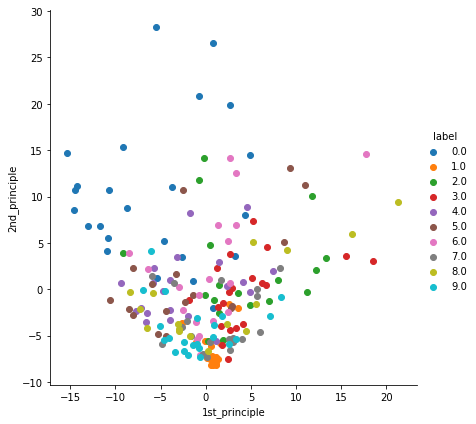

In [15]:
# plotting the 2D datapoints with seaborn

import seaborn as sn
sn.FacetGrid(dataframe,hue="label",height = 6).map(plt.scatter,"1st_principle","2nd_principle").add_legend()

In [17]:
# from __future__ import print_function
# import pickle
# import os.path
# from googleapiclient.discovery import build
# from google_auth_oauthlib.flow import InstalledAppFlow
# from google.auth.transport.requests import Request

# # If modifying these scopes, delete the file token.pickle.
# SCOPES = ['https://www.googleapis.com/auth/drive.metadata.readonly']

# def fileFromDrive():
#     """Shows basic usage of the Drive v3 API.
#     Prints the names and ids of the first 10 files the user has access to.
#     """
#     creds = None
#     # The file token.pickle stores the user's access and refresh tokens, and is
#     # created automatically when the authorization flow completes for the first
#     # time.
#     if os.path.exists('token.pickle'):
#         with open('token.pickle', 'rb') as token:
#             creds = pickle.load(token)
#     # If there are no (valid) credentials available, let the user log in.
#     if not creds or not creds.valid:
#         if creds and creds.expired and creds.refresh_token:
#             creds.refresh(Request())
#         else:
#             flow = InstalledAppFlow.from_client_secrets_file(
#                 'credentials.json', SCOPES)
#             creds = flow.run_local_server()
#         # Save the credentials for the next run
#         with open('token.pickle', 'wb') as token:
#             pickle.dump(creds, token)

#     service = build('drive', 'v3', credentials=creds)

#     # Call the Drive v3 API
#     results = service.files().list(
#         pageSize=10, fields="nextPageToken, files(id, name)").execute()
#     items = results.get('files', [])

#     if not items:
#         print('No files found.')
#     else:
#         print('Files:')
#         for item in items:
#             print(u'{0} ({1})'.format(item['name'], item['id']))

# fileFromDrive()

### PCA using scikit learn

In [18]:
# intializing the pca

from sklearn import decomposition
pca = decomposition.PCA()

In [19]:
# configuring the parameters
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca reduced will contain the 2-d projects of simple data
print("shape of pca reduced",pca_data.shape)

shape of pca reduced (200, 2)


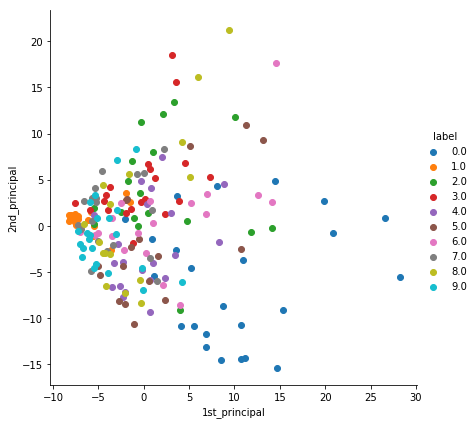

In [20]:
# attaching the label for each 2-d data points
pca_data = np.vstack((pca_data.T,labels)).T

# creating new dataframe which helps us in plotting the result data

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df,hue="label",height=6).map(plt.scatter,"1st_principal", "2nd_principal").add_legend()

plt.show()

In [21]:
# there is a typo in the ipython notebook, as eigenvalues generated are in ascending order, when we multiply vector*sample_data^T

# vector[0]*X[i] will be second principle component

# vector[1]*x[i] will be first principle component